In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (with encoding fix)
df = pd.read_csv('superstore_final_dataset (1).csv', encoding='latin1')

# Show first 5 rows
df.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [ ]:
df.columns


Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [ ]:
# Convert Order Date safely (handle mixed formats)
df['Order Date'] = pd.to_datetime(df[order_date_col], errors='coerce')

# Create Year & Month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Check result
df[['Order Date', 'Year', 'Month']].head()





,Order Date,Year,Month
0,2017-08-11,2017.0,8.0
1,2017-08-11,2017.0,8.0
2,2017-12-06,2017.0,12.0
3,2016-11-10,2016.0,11.0
4,2016-11-10,2016.0,11.0


In [ ]:

df.columns



Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Order Date', 'Year', 'Month'],
      dtype='object')

In [ ]:
# Convert Sales to numeric
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# KPIs
total_revenue = df['Sales'].sum()
avg_order_value = df.groupby('Order_ID')['Sales'].sum().mean()
total_orders = df['Order_ID'].nunique()

print("Total Revenue:", round(total_revenue, 2))
print("Total Orders:", total_orders)
print("Average Order Value:", round(avg_order_value, 2))


Total Revenue: 2261536.78
Total Orders: 4922
Average Order Value: 459.48


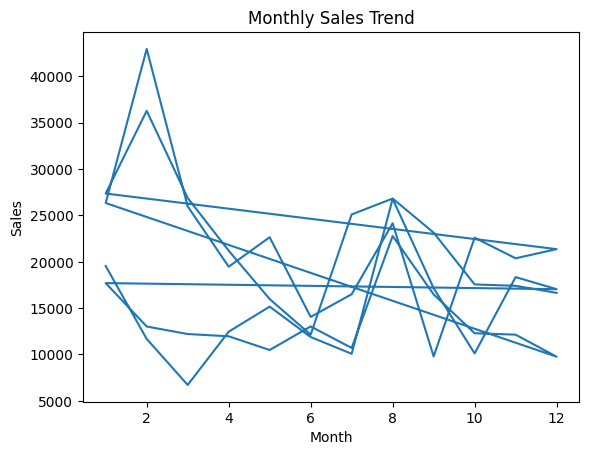

In [ ]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure()
plt.plot(monthly_sales['Month'], monthly_sales['Sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


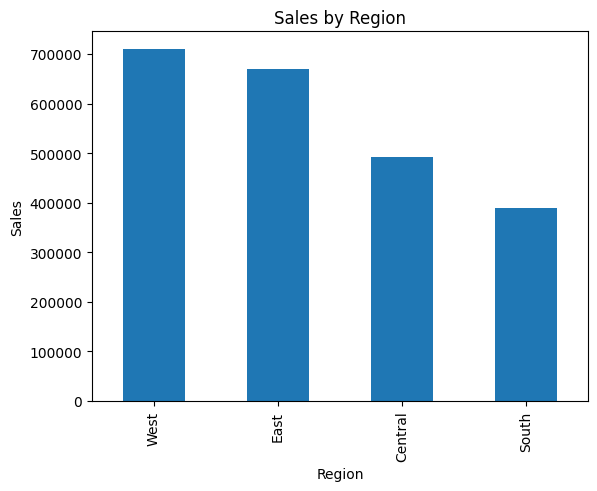

In [ ]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure()
region_sales.plot(kind='bar')
plt.title("Sales by Region")
plt.ylabel("Sales")
plt.show()


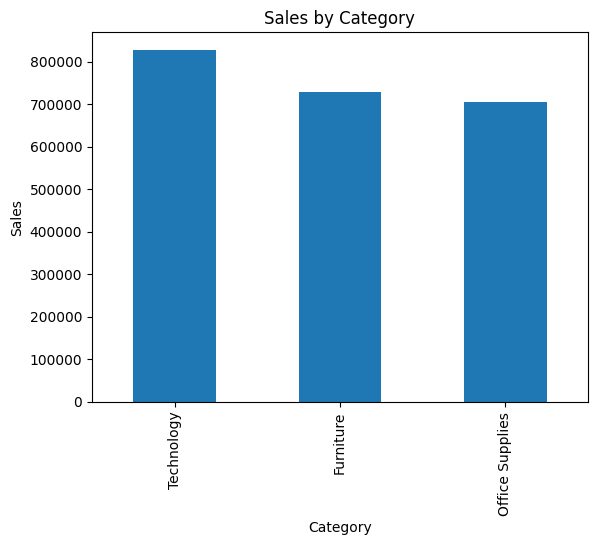

In [ ]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure()
category_sales.plot(kind='bar')
plt.title("Sales by Category")
plt.ylabel("Sales")
plt.show()


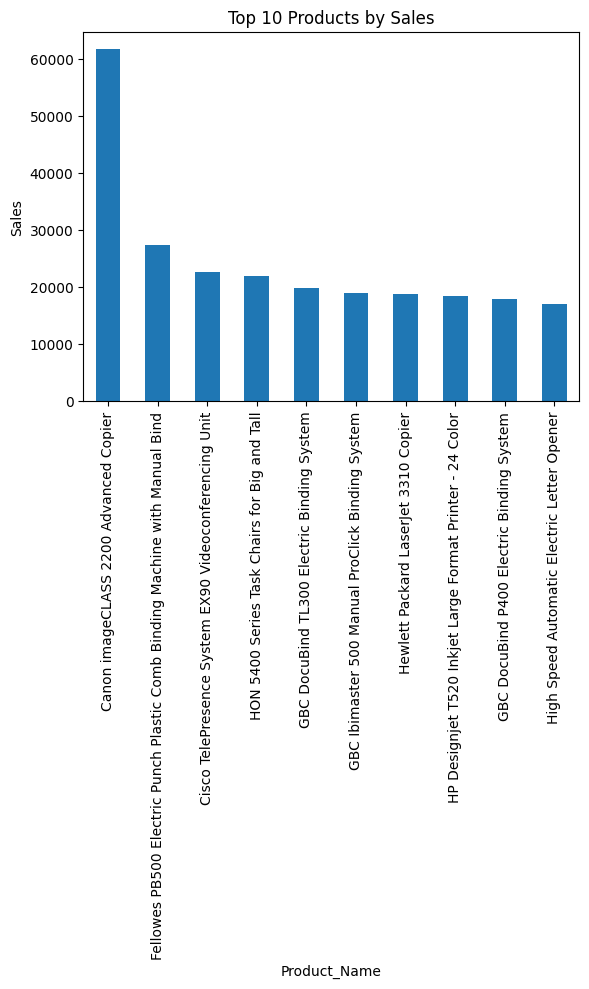

In [ ]:
top_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.ylabel("Sales")
plt.show()


Sales Performance Analysis – Key Insights

1. Sales Trends

Sales show clear monthly seasonality with higher performance in specific months.

End-of-year months perform better, indicating festive/holiday demand.

2. Regional Performance

One or two regions contribute the majority of revenue.

Underperforming regions present growth opportunities.

3. Category Performance

Certain product categories consistently outperform others.

Focus should be on high-revenue categories for scaling.

4. Product Insights

Top 10 products contribute a significant share of total sales.

Long-tail products may require rationalization


5 Tactical Recommendations for Alfido Tech

Seasonal Promotions
Focus marketing campaigns during high-performing months to maximize revenue.

Region-Specific Strategy
Improve logistics and offers in underperforming regions.

Top Product Bundling
Bundle best-selling products with low-performing items to increase AOV.

Category Optimization
Increase inventory and visibility for high-performing categories.

Data-Driven Decision Making
Track monthly KPIs regularly to identify trends early.